In [162]:
#Read annotations from csv
import requests
import pandas as pd
r=requests.get('https://github.com/mlukan/GDA3B2021/raw/main/ProjectFaceMask/annotdf.csv')
from io import StringIO
#StringIO("""col1;col2;col3
andf=pd.read_csv(StringIO(r.text),sep=';')

In [163]:
andf

,Unnamed: 0,xmin,ymin,xmax,ymax,label,file,width,height,depth
0,0,76,236,149,349,without_mask,maksssksksss530.png,301,400,3
1,1,241,60,271,97,with_mask,maksssksksss367.png,400,267,3
2,2,89,169,215,309,without_mask,maksssksksss442.png,301,400,3
3,3,156,80,222,155,with_mask,maksssksksss242.png,400,300,3
4,4,75,75,158,161,with_mask,maksssksksss215.png,400,400,3
...,...,...,...,...,...,...,...,...,...,...
4067,4067,235,43,272,87,with_mask,maksssksksss116.png,400,225,3
4068,4068,304,68,336,102,with_mask,maksssksksss116.png,400,225,3
4069,4069,379,61,399,96,with_mask,maksssksksss116.png,400,225,3
4070,4070,89,210,180,303,with_mask,maksssksksss339.png,400,400,3


In [164]:
import xmltodict
import os
def parse_file(path,file=None):
    '''
    parses xml file into list of dictionaries
    '''
    path=path+file
    
    def parse_object(obj,metadata):
        #Parse annotation['object'] into a dictionary including parent metadata
        objdict={}
        objdict = obj['bndbox']
        #print(objdict)
        objdict['label']=obj['name']
        outdict = {**objdict,**metadata}
        return outdict
    #print(path)
    with open(path,'r') as f:
        #Read xml file and parse it into an ordered dictionary
        parsed=xmltodict.parse(f.read())
        #Select just the key 'annotation' for further processing
        annot=parsed['annotation']
        
        parselist=[]
        metadata={}
        metadata['file']=annot['filename']
        size= annot['size']
        #Collect  image metadata
        metadata={**metadata,**size}
        #print('Metadata',metadata)
        #Extract data about labeled objects
        if type(annot['object']) is list:
            for obj in annot['object']:
                parselist.append(parse_object(obj,metadata))
        else:
            parselist.append(parse_object(annot['object'],metadata))
        return parselist
#parse_file(os.getcwd()+'/','test.xml')


In [165]:
#Create a list of dictionaries of fall xml files in a specified directory
import os
import pandas as pd
datalist=[]
for file in os.listdir('annotations'):
    if 'xml' in file:
        objlist=parse_file('./annotations/',file)
        datalist.extend(objlist)
annotdf=pd.DataFrame(datalist)


In [166]:
annotdf

,xmin,ymin,xmax,ymax,label,file,width,height,depth
0,76,236,149,349,without_mask,maksssksksss530.png,301,400,3
1,241,60,271,97,with_mask,maksssksksss367.png,400,267,3
2,89,169,215,309,without_mask,maksssksksss442.png,301,400,3
3,156,80,222,155,with_mask,maksssksksss242.png,400,300,3
4,75,75,158,161,with_mask,maksssksksss215.png,400,400,3
...,...,...,...,...,...,...,...,...,...
4067,235,43,272,87,with_mask,maksssksksss116.png,400,225,3
4068,304,68,336,102,with_mask,maksssksksss116.png,400,225,3
4069,379,61,399,96,with_mask,maksssksksss116.png,400,225,3
4070,89,210,180,303,with_mask,maksssksksss339.png,400,400,3


In [184]:
annotdf.groupby(by='file').count().sort_values(by='label',ascending=False)[:20]

,xmin,ymin,xmax,ymax,label,width,height,depth
file,,,,,,,,
maksssksksss603.png,115,115,115,115,115,115,115,115
maksssksksss518.png,83,83,83,83,83,83,83,83
maksssksksss240.png,61,61,61,61,61,61,61,61
maksssksksss260.png,53,53,53,53,53,53,53,53
maksssksksss52.png,51,51,51,51,51,51,51,51
maksssksksss539.png,41,41,41,41,41,41,41,41
maksssksksss296.png,35,35,35,35,35,35,35,35
maksssksksss89.png,29,29,29,29,29,29,29,29
maksssksksss695.png,28,28,28,28,28,28,28,28


In [168]:
annotdf[annotdf['file']=='maksssksksss603.png']

,xmin,ymin,xmax,ymax,label,file,width,height,depth
1325,49,11,55,17,with_mask,maksssksksss603.png,400,278,3
1326,32,52,40,60,with_mask,maksssksksss603.png,400,278,3
1327,52,76,61,86,without_mask,maksssksksss603.png,400,278,3
1328,47,98,58,109,with_mask,maksssksksss603.png,400,278,3
1329,68,100,75,111,with_mask,maksssksksss603.png,400,278,3
...,...,...,...,...,...,...,...,...,...
1435,356,18,362,24,with_mask,maksssksksss603.png,400,278,3
1436,346,9,351,16,with_mask,maksssksksss603.png,400,278,3
1437,370,13,376,18,with_mask,maksssksksss603.png,400,278,3
1438,382,6,386,12,without_mask,maksssksksss603.png,400,278,3


In [169]:
#Install PIL(Pillow) for image transformation
#!pip install Pillow
from PIL import Image
import numpy as np
#Check shape of the image with the largest number  of faces
im = np.asarray(Image.open('./images/maksssksksss603.png'))
im.shape

(278, 400, 4)

In [170]:
#Create a list of cropped and resized images (resolution 32x32)
import matplotlib.pyplot as plt
imagelist=[]
from PIL import Image
for i,row in andf.iterrows():
    im=Image.open('./images/'+row['file'])
    im = im.crop((row['xmin'], row['ymin'],row['xmax'],row['ymax']))
    imresized = im.resize((32,32))
    imagelist.append(imresized)

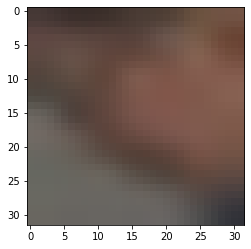

In [13]:
plt.imshow(imagelist[21])

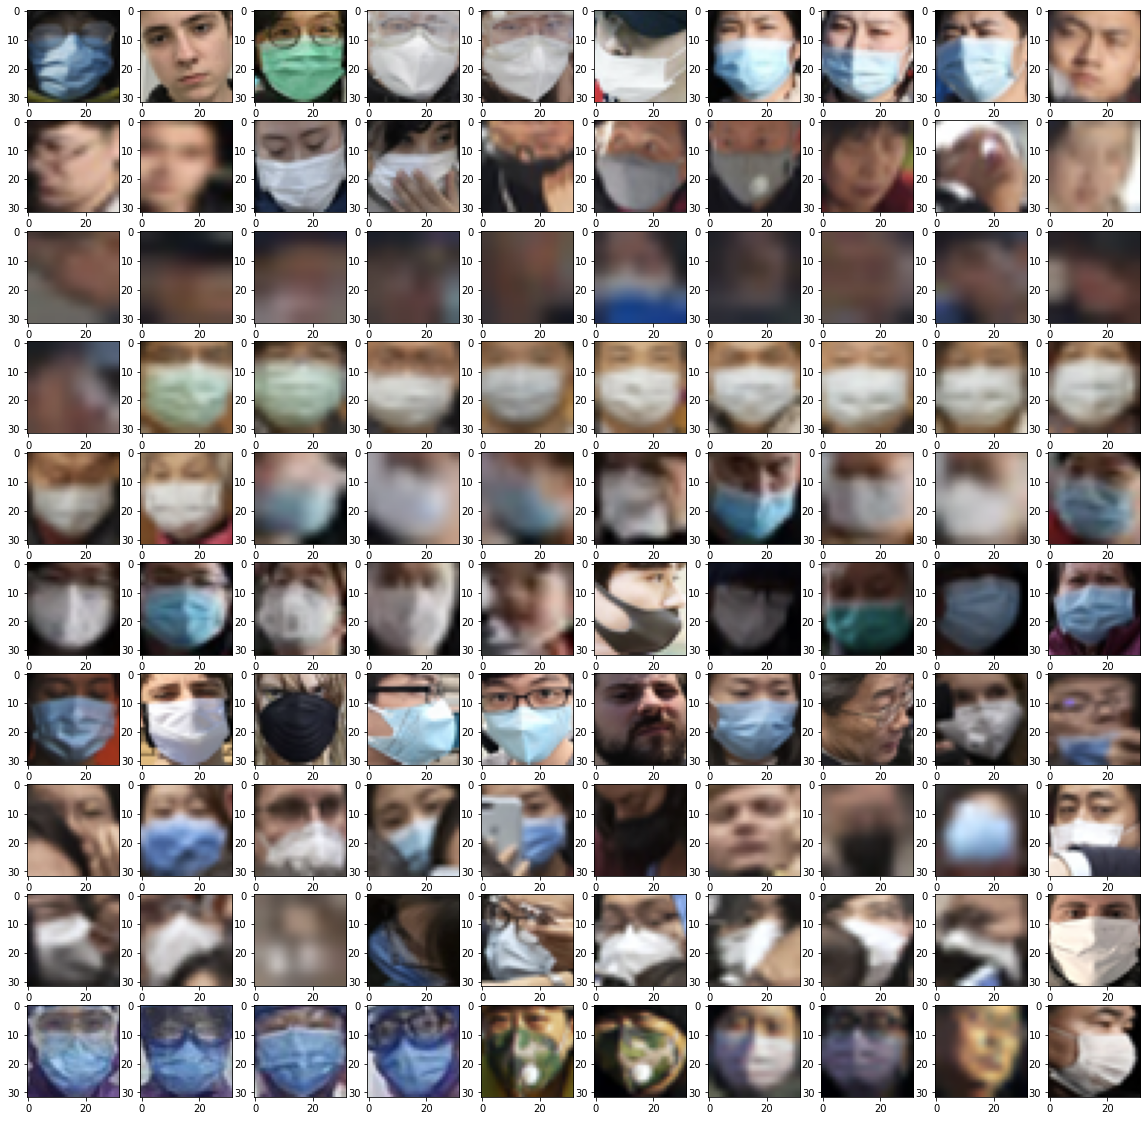

In [14]:
#Plot first hundred cropped images
w = 10
h = 10
fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = imagelist[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [15]:
#Stack resized images into a numpy array, reduce the number of channels to 3
imagearray=np.stack([np.array(im)[...,:3]  for im in imagelist], axis=0)

In [16]:
imagearray.shape

(4072, 32, 32, 3)

In [17]:
#Flatten the image np array
imagesflat=imagearray.reshape(4072,32*32*3)
imagesflat.shape

(4072, 3072)

### SVM model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(imagesflat/255,andf['label'])


In [33]:
%%time
SVM = svm.SVC(C=1, kernel='rbf',class_weight='balanced')
SVM.fit(X_train,y_train)
predictions = SVM.predict(X_test)
print("Accuracy: ",accuracy_score(predictions, y_test)*100)


Accuracy:  93.02554027504911
CPU times: user 25.2 s, sys: 0 ns, total: 25.2 s
Wall time: 25.2 s


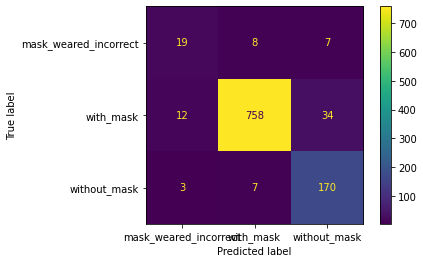

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=SVM.classes_);
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_);
disp.plot(values_format = '');

In [21]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, predictions,labels=SVM.classes_,zero_division=1,output_dict=True))

,mask_weared_incorrect,with_mask,without_mask,accuracy,macro avg,weighted avg
precision,0.558824,0.980595,0.805687,0.930255,0.781702,0.935582
recall,0.558824,0.942786,0.944444,0.930255,0.815351,0.930255
f1-score,0.558824,0.961319,0.869565,0.930255,0.796569,0.931652
support,34.000000,804.000000,180.000000,0.930255,1018.000000,1018.000000


### Lazy predict
I had trouble with lazypredict version 0.2.9  due to unresolved sklearn dependencies. Had to downgrade to version 0.2.8

In [ ]:
#!pip install lazypredict==0.2.8
from lazypredict.Supervised import LazyClassifier


In [24]:

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [07:39<00:00, 15.86s/it]


In [28]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.89,0.72,None,0.89,24.93
LogisticRegression,0.91,0.70,None,0.91,4.03
Perceptron,0.92,0.69,None,0.91,1.91
PassiveAggressiveClassifier,0.90,0.69,None,0.90,4.25
XGBClassifier,0.94,0.67,None,0.93,63.78
SGDClassifier,0.92,0.66,None,0.91,2.93
LGBMClassifier,0.94,0.65,None,0.92,77.08
GaussianNB,0.65,0.65,None,0.70,0.83
KNeighborsClassifier,0.92,0.64,None,0.90,19.13


###  Linear SVC

Accuracy:  91.74852652259332
CPU times: user 21 s, sys: 67.9 ms, total: 21 s
Wall time: 21 s


,mask_weared_incorrect,with_mask,without_mask,accuracy,macro avg,weighted avg
precision,0.38,0.96,0.84,0.92,0.72,0.92
recall,0.35,0.95,0.89,0.92,0.73,0.92
f1-score,0.36,0.95,0.86,0.92,0.73,0.92
support,34.00,804.00,180.00,0.92,1018.00,1018.00


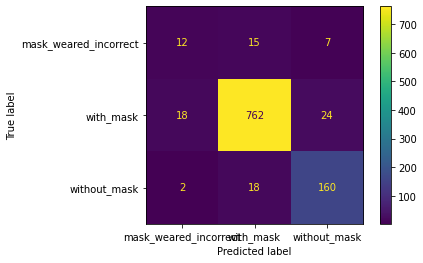

In [32]:
%%time
SVC = svm.LinearSVC(class_weight='balanced')
SVC.fit(X_train,y_train)
predictionsSVC = SVC.predict(X_test)
print("Accuracy: ",accuracy_score(predictionsSVC, y_test)*100)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictionsSVC, labels=SVC.classes_);
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC.classes_);
disp.plot(values_format = '');
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, predictionsSVC,labels=SVC.classes_,zero_division=1,output_dict=True))

### Conclusion
Due to dataset imbalance - mask_weared_incorrect is heavily underrepresented, the prediction for this class is not good. The best ML method suggested by lazypredict - LinearSVC actually did not work better than SVM with some hyperparameter tuning

The overall accuracy of the baseline SVM model reaches 93%, F1-score 0.93 with good prediction accuracy on class "with mask" and a bit worse on "without_mask"

In [57]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
lencoder=LabelEncoder()
labels=lencoder.fit_transform(andf['label'])
labels

array([2, 1, 2, ..., 1, 1, 1])

In [58]:
# Create input data with encoded labels
X_trainCNN,X_testCNN,y_trainCNN,y_testCNN=train_test_split(imagearray/255,labels)

### CNN

In [214]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.callbacks  import  EarlyStopping

#import tensorflow_datasets as tfds
from keras.layers import MaxPooling2D, Conv2D,Flatten,Dense
from keras.models import Sequential
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt

In [215]:
es = EarlyStopping(monitor="val_accuracy",verbose=1,mode='max',patience=4)
def cnnmodel(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.build()
    model.summary()
    return model

In [216]:
cnnmod = cnnmodel(X_trainCNN.shape[1:])
# compile model
cnnmod.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


cnnmodhist = cnnmod.fit(X_trainCNN,y_trainCNN, epochs=30,  validation_data=(X_testCNN,y_testCNN),callbacks=[es])

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_240 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_159 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_241 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_160 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_161 (MaxPoolin (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_63 (Flatten)         (None, 512)             

In [219]:
_, acc = cnnmod.evaluate(X_testCNN,y_testCNN)
print('Test Accuracy: %.3f' % (acc * 100))


32/32 [==============================] - 0s 6ms/step - loss: 0.1471 - accuracy: 0.9519
Test Accuracy: 95.187


In [220]:
def show_history_acc_loss(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
#    fig.set_size_inches(18.5, 10.5)
    fig.set_size_inches(10.5, 5.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'validation_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show();

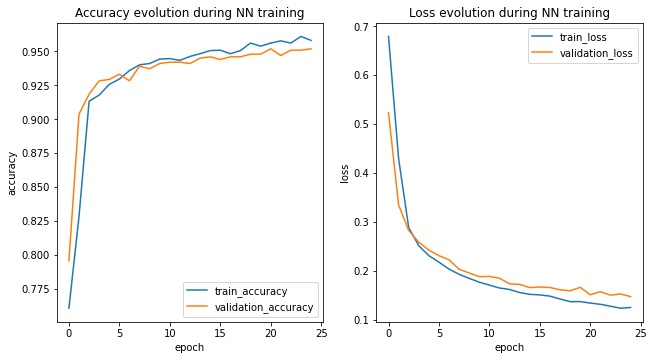

In [221]:
show_history_acc_loss(cnnmodhist)

In [119]:
predictionsCNN=cnnmod.predict(X_testCNN)
predictionsCNN=np.argmax(predictionsCNN,axis=1)
predictionsCNN

array([1, 1, 1, ..., 1, 2, 1])

Accuracy:  95.57956777996071


,mask_weared_incorrect,with_mask,without_mask,accuracy,macro avg,weighted avg
precision,0.75,0.97,0.91,0.96,0.88,0.95
recall,0.33,0.98,0.95,0.96,0.76,0.96
f1-score,0.46,0.98,0.93,0.96,0.79,0.95
support,36.00,810.00,172.00,0.96,1018.00,1018.00


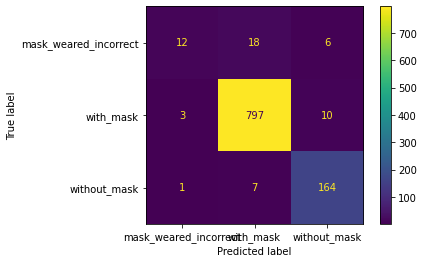

In [124]:
#Overall accuracy
print("Overall accuracy: ",accuracy_score(predictionsCNN, y_testCNN)*100)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Confusion matrix
cm = confusion_matrix(lencoder.inverse_transform(y_testCNN), lencoder.inverse_transform(predictionsCNN), labels=lencoder.classes_);
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lencoder.classes_);
disp.plot(values_format = '');

# Classification report
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(lencoder.inverse_transform(y_testCNN), lencoder.inverse_transform(predictionsCNN),labels=lencoder.classes_,zero_division=1,output_dict=True))

### Try model with focal loss function


In [159]:
from sklearn.preprocessing import OneHotEncoder
labels2=labels.reshape(-1,1)
ohencoder=OneHotEncoder()
labels2=ohencoder.fit_transform(labels2)
print(labels2.shape)
X_trainCNN2,X_testCNN2,y_trainCNN2,y_testCNN2=train_test_split(imagearray/255,labels2)

(4072, 3)


In [160]:
es = EarlyStopping(monitor="val_accuracy",verbose=1,mode='max',patience=4)
def cnnmodel2(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.build()
    model.summary()
    return model

In [ ]:

cnnmod2 = cnnmodel2(X_trainCNN2.shape[1:])
# compile model
def multi_cat_focal_loss(alpha, gamma=2.0):
    import tensorflow as tf
    """
    focal loss for multi category of multi label problem
         Focal loss for multi-class or multi-label problems
         Alpha is used to specify the weight of different categories/tags. The array size needs to be the same as the number of categories.
         When there is a skew between different categories/tags in your dataset, try applying this function as a loss.
    Usage:
     model.compile(loss=[multi_cat_focal_loss(alpha=[1,2,3,2], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    epsilon = 1.e-7
    alpha = tf.constant(alpha, dtype=tf.float32)
    #alpha = tf.constant([[1],[1],[1],[1],[1]], dtype=tf.float32)
    #alpha = tf.constant_initializer(alpha)
    gamma = float(gamma)
    def multi_category_focal_loss1_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_t = tf.multiply(y_true, y_pred) + tf.multiply(1-y_true, 1-y_pred)
        ce = -tf.math.log(y_t)
        weight = tf.pow(tf.subtract(1., y_t), gamma)
        fl = tf.matmul(tf.multiply(weight, ce), alpha)
        loss = tf.reduce_mean(fl)
        return loss
    return multi_category_focal_loss1_fixed

#cnnmod.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnnmod2.compile(optimizer=Adam(learning_rate=5e-3),loss=multi_cat_focal_loss(alpha=0.2, gamma=2.0), metrics=['accuracy'])


cnnmodhist2 = cnnmod2.fit(X_trainCNN,y_trainCNN, epochs=30,  validation_data=(X_testCNN,y_testCNN),callbacks=[es])

### Face recognition

In [173]:
'''
!pip install keras_vggface
!pip install mtcnn
'''

'\n!pip install keras_vggface\n!pip install mtcnn\n'

     |████████████████████████████████| 2.3 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 51.0 MB 88 kB/s s eta 0:00:01    |███                             | 4.7 MB 20.2 MB/s eta 0:00:03     |███████▏                        | 11.5 MB 20.2 MB/s eta 0:00:02     |████████                        | 12.9 MB 20.2 MB/s eta 0:00:02     |████████████                    | 19.0 MB 20.2 MB/s eta 0:00:02     |███████████████████████▏        | 36.9 MB 34.2 MB/s eta 0:00:01


In [177]:
#Get index numbers of badmask rows
badmaskdf=andf[andf['label']=='mask_weared_incorrect']
badmasklist=badmaskdf.index.values.tolist()

In [181]:
badmaskimagelist=[imagelist[i] for i in badmasklist]
#badmaskimagelist

In [188]:
#sudo apt-get update
#sudo apt install -y libgl1-mesa-glx

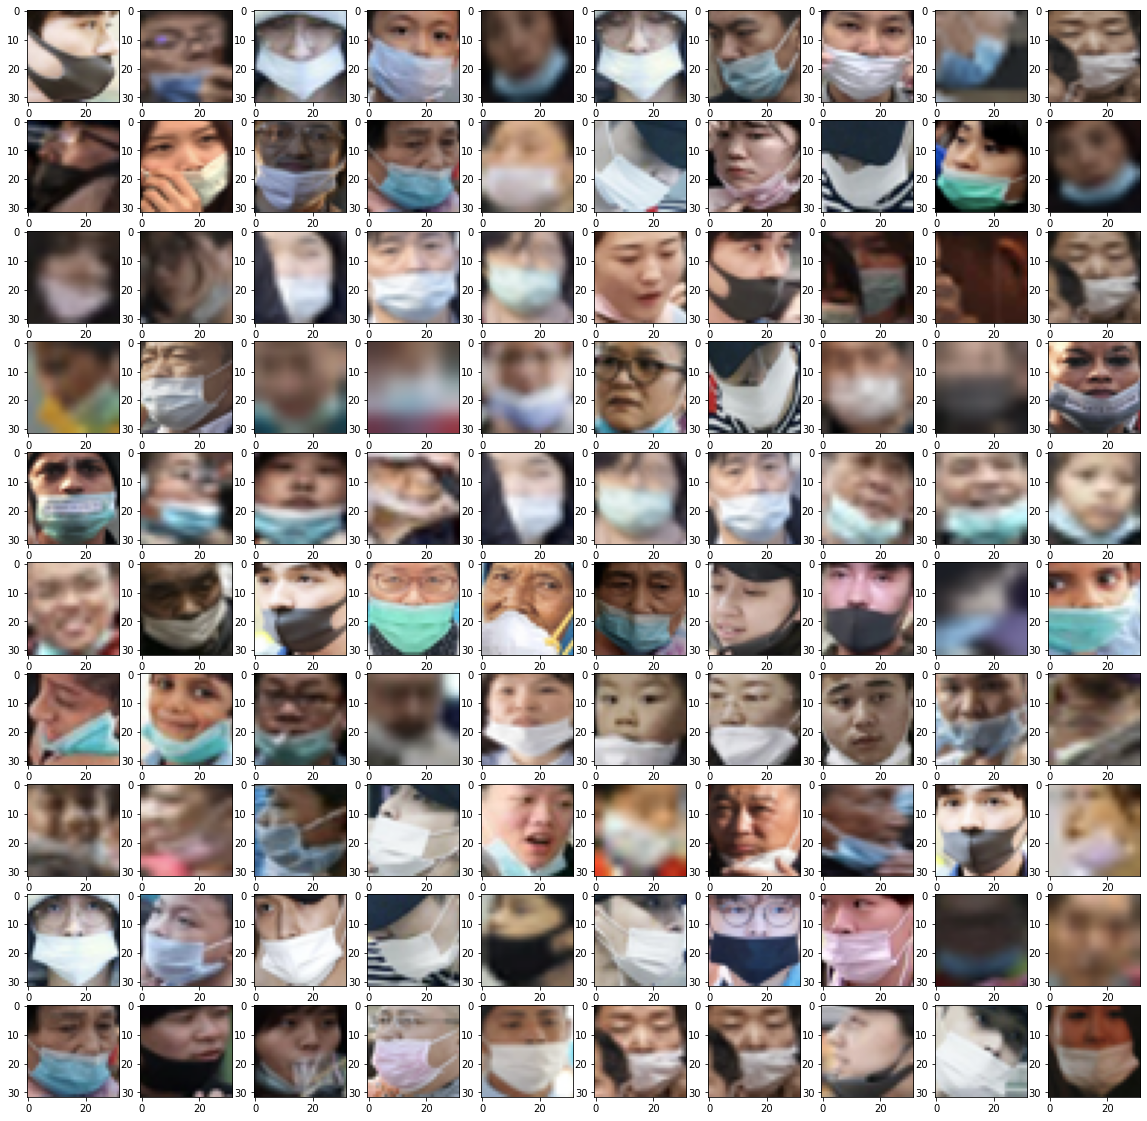

In [182]:
#Plot all incorrectly worn mask images
w = 13
h = 10
fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = badmaskimagelist[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [210]:
#Detect and show face
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
import cv2

#image = plt.imread('./images/maksssksksss410.png')
from PIL import Image
import numpy as np
im = np.asarray(Image.open('./images/maksssksksss116.png'))
im=np.array(im)[...,:3]
detector = MTCNN()
#img = cv2.resize(im,(240,240))     # resize image to match model's expected sizing
#img = img.reshape(1,240,240,3)
faces = detector.detect_faces(im)
for face in faces:
    print(face)

{'box': [308, 61, 27, 33], 'confidence': 0.9999924898147583, 'keypoints': {'left_eye': (313, 74), 'right_eye': (326, 74), 'nose': (319, 84), 'mouth_left': (314, 89), 'mouth_right': (325, 88)}}
{'box': [162, 71, 28, 36], 'confidence': 0.9998084902763367, 'keypoints': {'left_eye': (167, 85), 'right_eye': (181, 86), 'nose': (172, 91), 'mouth_left': (167, 100), 'mouth_right': (179, 101)}}
{'box': [234, 35, 37, 45], 'confidence': 0.9990542531013489, 'keypoints': {'left_eye': (241, 53), 'right_eye': (258, 51), 'nose': (247, 59), 'mouth_left': (242, 70), 'mouth_right': (258, 69)}}
{'box': [115, 81, 34, 39], 'confidence': 0.9931467175483704, 'keypoints': {'left_eye': (126, 94), 'right_eye': (140, 95), 'nose': (132, 101), 'mouth_left': (125, 110), 'mouth_right': (138, 111)}}
{'box': [262, 205, 17, 18], 'confidence': 0.9339801669120789, 'keypoints': {'left_eye': (267, 210), 'right_eye': (276, 210), 'nose': (271, 214), 'mouth_left': (267, 220), 'mouth_right': (275, 219)}}
{'box': [375, 56, 23, 26

In [211]:
from matplotlib.patches import Rectangle

In [273]:

def highlight_faces(model,image_path):
    from PIL import Image
    import numpy as np
    def detect_faces(image_path):
        im = np.asarray(Image.open(image_path))
        im=np.array(im)[...,:3]
        detector = MTCNN()
        #img = cv2.resize(im,(240,240))     # resize image to match model's expected sizing
        #img = img.reshape(1,240,240,3)
        faces = detector.detect_faces(im)
        return faces
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    faces=detect_faces(image_path)
    for face in faces:
        x, y, width, height = face['box']
        im = Image.open(image_path)
        im = im.crop((x-10,y-10,x+width+20,y+height+20))
        imresized = im.resize((32,32))
        imarray=np.array(imresized)[...,:3]
        imarray=imarray.reshape(1,32,32,3)
        prediction = model.predict(imarray/255)
        prediction=np.argmax(prediction,axis=0)
        print('Prediction',prediction)
        colors={0:'orange',1:'green',2:'red'}
        face_border = Rectangle((x-5, y-5), width+10, height+10,
                          fill=False, color=colors[prediction])
        ax.add_patch(face_border)
    plt.show()

Prediction 1


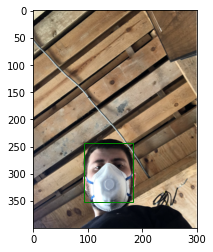

In [304]:
highlight_faces(cnnmod,'./images/maksssksksss405.png')

In [276]:
lencoder.classes_

array(['mask_weared_incorrect', 'with_mask', 'without_mask'], dtype=object)

In [305]:
cnnmod.save('facemaskcnn.h5')

In [306]:
!pip install  streamlit

     |████████████████████████████████| 7.8 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 38.2 MB/s eta 0:00:01
     |████████████████████████████████| 21.9 MB 32.3 MB/s eta 0:00:01    |████                            | 2.7 MB 32.3 MB/s eta 0:00:01     |██████                          | 4.2 MB 32.3 MB/s eta 0:00:01     |████████████████████████████▎   | 19.3 MB 32.3 MB/s eta 0:00:01
     |████████████████████████████████| 727 kB 36.9 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 8.1 MB/s  eta 0:00:01
     |████████████████████████████████| 4.2 MB 35.6 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 8.0 MB/s  eta 0:00:01
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13451 sha256=d69630a7c488cf314875f18e94bfc243ed7c6a197e66cd3e97d4d37b2d0b6ddb
  Stored in directory: /home/A19893678/.cache/pip/wheels/b7/a5/68/fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker
